# Analysis for NHAMCS data
### Create algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [5]:
pwd()

'C:\\Users\\Alyssa\\Desktop\\CS122\\Doctor_Who'

In [8]:
cd Doctor-who

C:\Users\Alyssa\Desktop\CS122\Doctor_Who\Doctor-who


In [9]:
all_data = pd.read_csv('nhamcs_data.csv')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
all_data.columns.values

array(['Unnamed: 0', 'VMONTH', 'VDAYR', 'ARRTIME', 'WAITTIME', 'IMMEDR',
       'PAINSCALE', 'HOSPCODE', 'AMBDIV', 'TOTHRDIVR', 'PHYSPRACTRIA',
       'FASTTRAK', 'REGION', 'MSA'], dtype=object)

In [12]:
data = all_data[all_data['WAITTIME'] >= 0].copy()

In [13]:
data.loc[:,'AVGWAIT'] = data.loc[:,'WAITTIME'].groupby(data.loc[:,'HOSPCODE']).transform('mean')

In [14]:
data.head()

,Unnamed: 0,VMONTH,VDAYR,ARRTIME,WAITTIME,IMMEDR,PAINSCALE,HOSPCODE,AMBDIV,TOTHRDIVR,PHYSPRACTRIA,FASTTRAK,REGION,MSA,AVGWAIT
0,0,11,2,1236,18,4,10,1,2,-7,2,1,1,1,33.959596
1,1,11,2,2114,103,4,3,1,2,-7,2,1,1,1,33.959596
2,2,11,3,1619,73,3,8,1,2,-7,2,1,1,1,33.959596
3,3,11,4,950,27,4,7,1,2,-7,2,1,1,1,33.959596
4,4,11,4,1738,1,4,5,1,2,-7,2,1,1,1,33.959596


In [15]:
data.AVGWAIT.describe()

count    17153.000000
mean        40.285023
std         28.742999
min          0.000000
25%         21.524590
50%         36.011364
75%         52.367089
max        211.352941
Name: AVGWAIT, dtype: float64

In [16]:
values = data[['VMONTH', 'VDAYR', 'ARRTIME', 'AVGWAIT', 'PAINSCALE', 'REGION', 'MSA', 'WAITTIME']]

In [17]:
values.head()

,VMONTH,VDAYR,ARRTIME,AVGWAIT,PAINSCALE,REGION,MSA,WAITTIME
0,11,2,1236,33.959596,10,1,1,18
1,11,2,2114,33.959596,3,1,1,103
2,11,3,1619,33.959596,8,1,1,73
3,11,4,950,33.959596,7,1,1,27
4,11,4,1738,33.959596,5,1,1,1


In [18]:
columns = values.columns.values

In [19]:
values_nopain = values[values.PAINSCALE > 0].copy()

In [20]:
values_nopain.describe()

,VMONTH,VDAYR,ARRTIME,AVGWAIT,PAINSCALE,REGION,MSA,WAITTIME
count,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000
mean,6.104538,3.939028,1384.514789,40.689171,6.880726,2.613348,1.155045,41.040790
std,3.611983,1.974587,576.568823,28.771636,2.489486,1.011939,0.361967,70.852761
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,2.000000,1018.000000,21.524590,5.000000,2.000000,1.000000,8.000000
50%,6.000000,4.000000,1429.000000,36.530000,7.000000,3.000000,1.000000,20.000000
75%,9.000000,6.000000,1838.000000,52.737374,9.000000,3.000000,1.000000,46.000000
max,12.000000,7.000000,2359.000000,211.352941,10.000000,4.000000,2.000000,1105.000000


In [21]:
# need binary coding for month, day, region?
days = ['Sun', 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat']


In [22]:
for i in range(7):
    values_nopain[days[i]] = (values_nopain.VDAYR == i + 1).astype(float)

In [23]:
values_nopain.head()

,VMONTH,VDAYR,ARRTIME,AVGWAIT,PAINSCALE,REGION,MSA,WAITTIME,Sun,Mon,Tues,Wed,Thu,Fri,Sat
0,11,2,1236,33.959596,10,1,1,18,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11,2,2114,33.959596,3,1,1,103,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11,3,1619,33.959596,8,1,1,73,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,11,4,950,33.959596,7,1,1,27,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11,4,1738,33.959596,5,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(12):
    values_nopain[months[i]] = (values_nopain.VMONTH == i + 1).astype(float)

In [25]:
values_nopain.head()

,VMONTH,VDAYR,ARRTIME,AVGWAIT,PAINSCALE,REGION,MSA,WAITTIME,Sun,Mon,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,11,2,1236,33.959596,10,1,1,18,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11,2,2114,33.959596,3,1,1,103,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,11,3,1619,33.959596,8,1,1,73,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,11,4,950,33.959596,7,1,1,27,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11,4,1738,33.959596,5,1,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
regions = ['reg1', 'reg2', 'reg3', 'reg4']
for i in range(4):
    values_nopain[regions[i]] = (values_nopain.REGION == i + 1).astype(float)

In [101]:
# binning time not good idea: but should convert to real time? missing values 60-99

In [184]:
columns = days + months + regions + ['ARRTIME', 'PAINSCALE', 'MSA']

In [185]:
features = values_nopain[columns].copy()

In [186]:
features.describe()

,Sun,Mon,Tues,Wed,Thu,Fri,Sat,Jan,Feb,Mar,...,Oct,Nov,Dec,reg1,reg2,reg3,reg4,ARRTIME,PAINSCALE,MSA
count,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,...,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000,9365.000000
mean,0.134330,0.163267,0.147144,0.144154,0.140630,0.136359,0.134116,0.119915,0.112333,0.097918,...,0.062894,0.102403,0.064495,0.170742,0.267806,0.338815,0.222637,1384.514789,6.880726,1.155045
std,0.341025,0.369629,0.354268,0.351264,0.347658,0.343187,0.340796,0.324879,0.315793,0.297219,...,0.242785,0.303193,0.245647,0.376304,0.442839,0.473332,0.416039,576.568823,2.489486,0.361967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1018.000000,5.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1429.000000,7.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1838.000000,9.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2359.000000,10.000000,2.000000


In [187]:
target = values_nopain['WAITTIME']

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
model = LinearRegression(fit_intercept = False)
model.fit(features, target)
values_nopain['predicted'] = model.predict(features)
model.score(features, target)

0.012065506609236221

(0, 120)

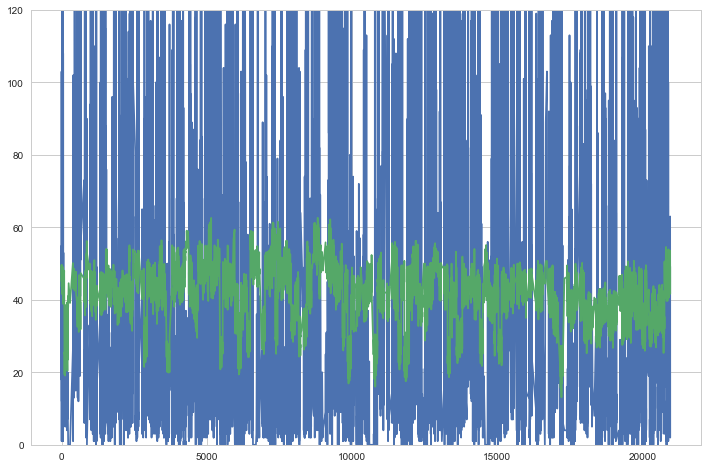

In [198]:
fig = plt.figure(figsize=(12, 8))
fig = plt.plot(values_nopain[['WAITTIME', 'predicted']])
plt.ylim(0, 120)

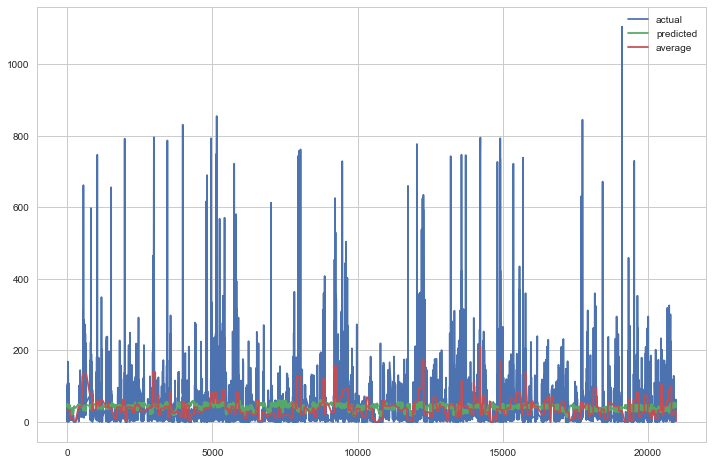

In [191]:
fig = plt.figure(figsize=(12, 8))
plt.plot(values_nopain['WAITTIME'], label = 'actual')
plt.plot(values_nopain['predicted'], label = 'predicted')
plt.plot(values_nopain['AVGWAIT'], label = 'average')

plt.legend()


In [182]:
params = pd.Series(model.coef_, index = features.columns)

In [183]:
params

Sun         -4.208609
Mon          0.419009
Tues        -0.026534
Wed          0.493019
Thu         -1.010272
Fri         -3.556117
Sat         -3.002442
Jan         -1.853115
Feb         -2.569624
Mar          2.106593
Apr         -2.102608
May         -0.296756
Jun          0.491305
Jul         -2.692714
Aug         -2.593430
Sep          0.671708
Oct         -1.044205
Nov         -2.081237
Dec          1.072138
reg1        -2.960057
reg2        -2.552092
reg3        -2.759865
reg4        -2.619932
ARRTIME      0.003922
AVGWAIT      1.018992
PAINSCALE    0.040511
MSA         -0.866473
dtype: float64

In [118]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(features, target)).coef_ for i in range(1000)], 0)

In [119]:
print(pd.DataFrame({'effect': params.round(2), 'error': err.round(2)}))

           effect  error
Sun         -4.21   1.92
Mon          0.42   1.95
Tues        -0.03   2.25
Wed          0.49   2.09
Thu         -1.01   2.35
Fri         -3.56   1.92
Sat         -3.00   2.07
Jan         -1.85   1.82
Feb         -2.57   2.34
Mar          2.11   2.53
Apr         -2.10   2.81
May         -0.30   2.29
Jun          0.49   2.36
Jul         -2.69   2.39
Aug         -2.59   2.10
Sep          0.67   2.20
Oct         -1.04   2.82
Nov         -2.08   2.49
Dec          1.07   2.45
reg1        -2.96   2.62
reg2        -2.55   2.69
reg3        -2.76   2.42
reg4        -2.62   2.63
ARRTIME      0.00   0.00
AVGWAIT      1.02   0.05
PAINSCALE    0.04   0.28
MSA         -0.87   1.99


In [171]:
# from this I would think it would be better to drop region, interestingly arrival time has no impact
# is it worth dropping data for painscale, doesn't seem to have much effect. Redo without regions first

In [121]:
# bin into morning, afternoon, evening, night? for time

In [122]:
data.WAITTIME.describe()

count    17153.000000
mean        40.285023
std         75.876409
min          0.000000
25%          7.000000
50%         19.000000
75%         44.000000
max       1305.000000
Name: WAITTIME, dtype: float64

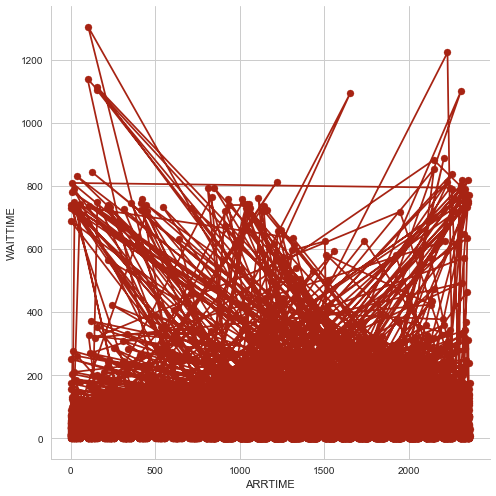

In [156]:
# Seaborn's set_style function allows us to set many aesthetic parameters.
sns.set_style("whitegrid")

## Create FacetGrid Object and set data:
cncted_scatter = sns.FacetGrid(data=data, size=7)

## Map visual encodings to the facetgrid object:
cncted_scatter.map(plt.scatter, 'ARRTIME', 'WAITTIME', color="#A72313")
cncted_scatter.map(plt.plot, 'ARRTIME', 'WAITTIME', color="#A72313")
#cncted_scatter.set(title="GRAPH", xlabel="Number of Poor Families w/ Children", ylabel="Families Receiving TANF")


In [ ]:
sns.boxplot(data = data, x = 'ARRTIME', y = 'WAITTIME', hue = 'IMMEDR')

(0, 120)

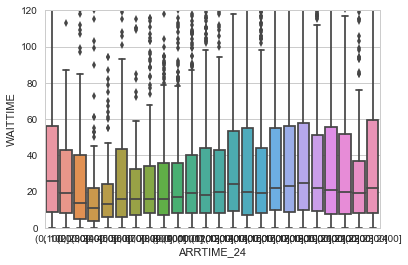

In [176]:
sns.boxplot(data = values_nopain, x = 'ARRTIME_24', y = 'WAITTIME')
plt.ylim((0, 120))

(0, 120)

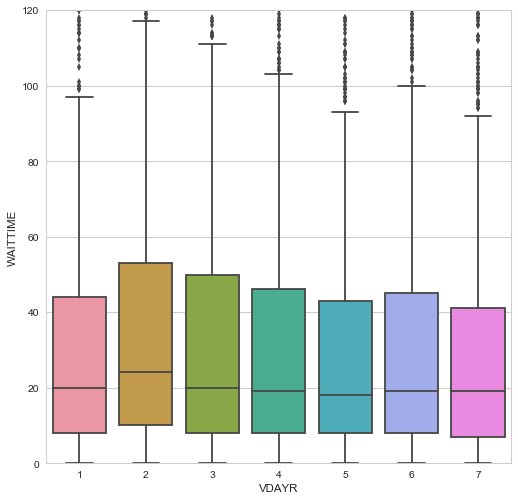

In [175]:
plt.figure(figsize=(8, 8), dpi=75) 
sns.boxplot(data = values_nopain, x = 'VDAYR', y = 'WAITTIME')
plt.ylim((0, 120))

In [173]:
hosp223 = data[data.HOSPCODE == 223]

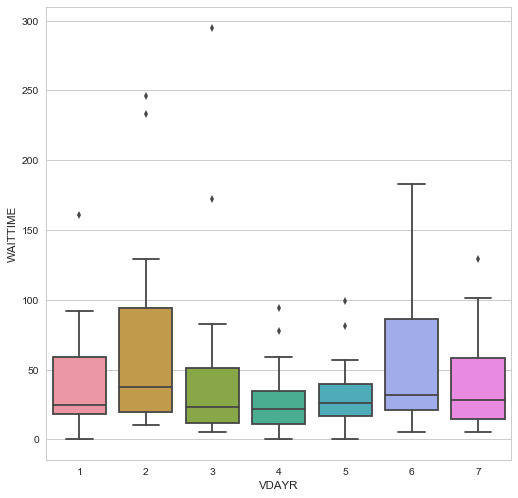

In [174]:
plt.figure(figsize=(8, 8), dpi=75) 
sns.boxplot(data = hosp223, x = 'VDAYR', y = 'WAITTIME')

(0, 240)

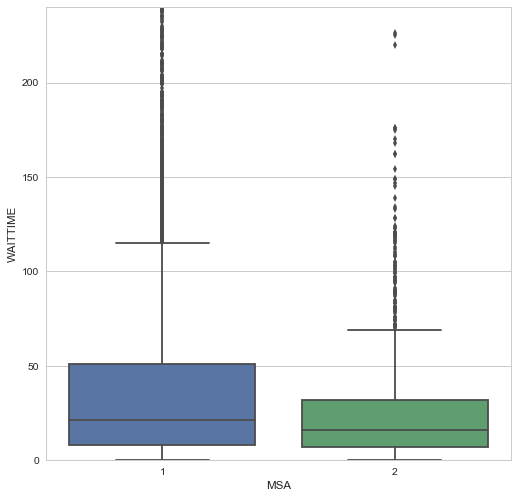

In [200]:
plt.figure(figsize=(8, 8), dpi=75) 
sns.boxplot(data = values_nopain, x = 'MSA', y = 'WAITTIME')
plt.ylim((0, 240))

In [201]:
import numpy as np

In [202]:
from scipy.stats import kendalltau

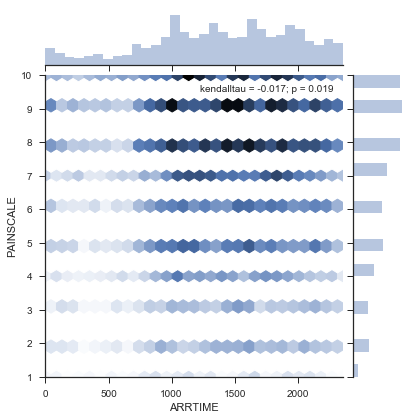

In [207]:
sns.set(style = 'ticks')
sns.jointplot(data = values_nopain, x = 'ARRTIME', y = 'PAINSCALE', kind = 'hex', stat_func = kendalltau)

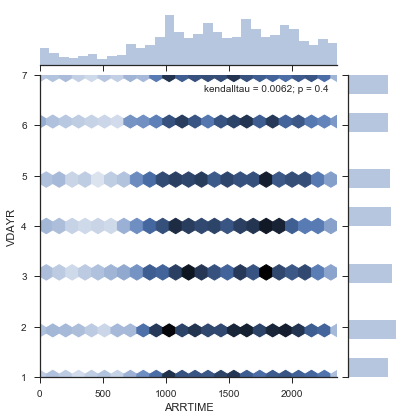

In [208]:
sns.set(style = 'ticks')
sns.jointplot(data = values_nopain, x = 'ARRTIME', y = 'VDAYR', kind = 'hex', stat_func = kendalltau)

In [300]:
h_data = values_nopain[['VMONTH', 'ARRTIME_24', 'WAITTIME', 'VDAYR']].copy()

In [212]:
flights = sns.load_dataset('flights')

In [296]:
flights.head()
flights.pivot('month', 'year', 'passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [277]:
ex = h_data.groupby(('ARRTIME_24', 'VMONTH')).size()
h_data.head()

,VMONTH,ARRTIME_24,WAITTIME
0,11,"(1200, 1300]",18
1,11,"(2100, 2200]",103
2,11,"(1600, 1700]",73
3,11,"(900, 1000]",27
4,11,"(1700, 1800]",1


In [297]:
h_data['Count'] = h_data.groupby(('ARRTIME_24', 'VMONTH')).transform('count')
h_data.head()
grouped = h_data.groupby(('ARRTIME_24', 'VMONTH')).size()
grouped = grouped.unstack()

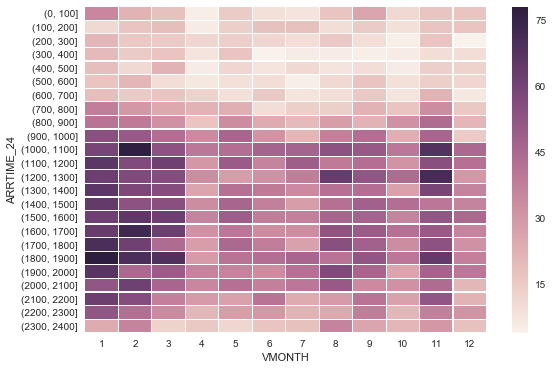

In [299]:
sns.set()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(grouped, annot = False, fmt = 'd', linewidths = .25, ax = ax)

In [304]:
group2 = h_data.groupby(('ARRTIME_24', 'VDAYR')).size()
group2 = group2.unstack()

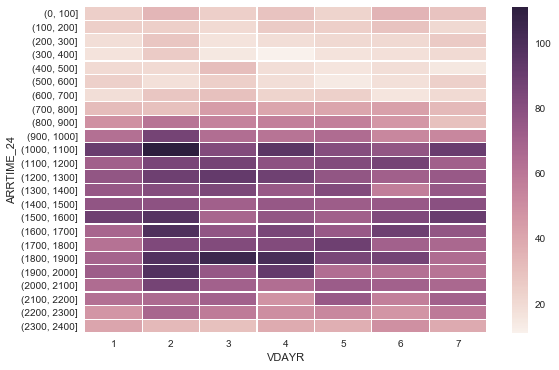

In [305]:
sns.set()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(group2, annot = False, fmt = 'd', linewidths = .25, ax = ax)

In [306]:
group3 = h_data.groupby(('VMONTH', 'VDAYR')).size()
group3 = group3.unstack()

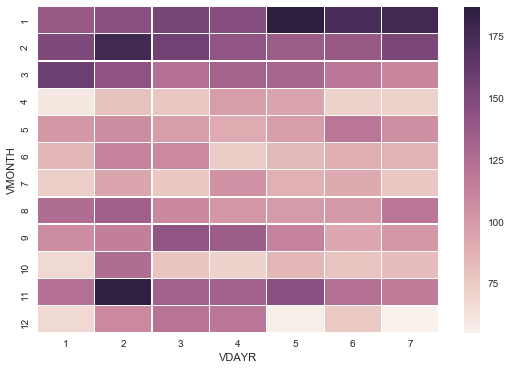

In [307]:
sns.set()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(group3, annot = False, fmt = 'd', linewidths = .25, ax = ax)

In [1]:
# do something like this but not this
group4 = h_data.groupby(('VMONTH', 'VDAYR'))['WAITTIME'].mean()
group4 = group4.unstack()

NameError: name 'h_data' is not defined